# 2. Chapter :  Basic Image Manipulations

In this notebook we will cover how to perform image transformations including:

* Accessing and manipulating images pixels
* Image resizing
* Cropping
* Flipping

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


### <font style="color:rgb(8,133,37)">Original checkerboard image</font>

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

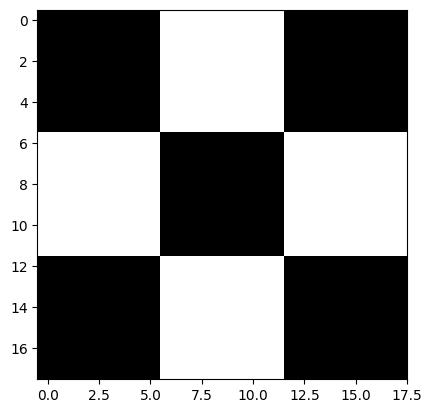

In [2]:
# Read image as gray scale.
cb_img = cv.imread("Images/checkerboard_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

## Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

In [3]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

0
255


## Modifying Image Pixels
We can modify the intensity values of pixels in the same manner as described above.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

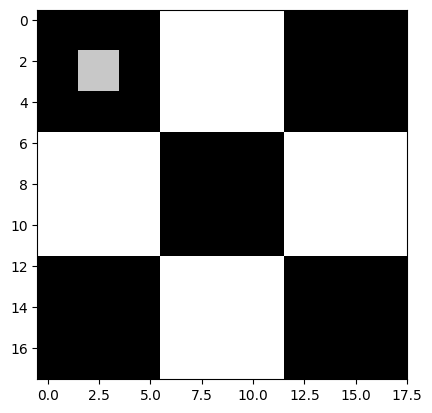

In [4]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

# Cropping Images

Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

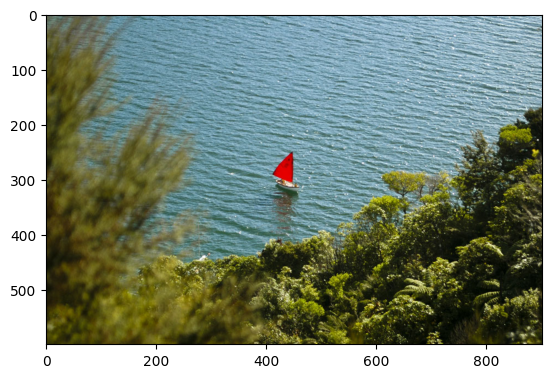

In [17]:
img_NZ_bgr = cv.imread("Images/New_Zealand_Boat.jpg", cv.IMREAD_COLOR)
img_NZ_rgb = cv.cvtColor(img_NZ_bgr, cv.COLOR_BGR2RGB)

plt.imshow(img_NZ_rgb)

### <font color="green">Crop out the middle region of the image</font>

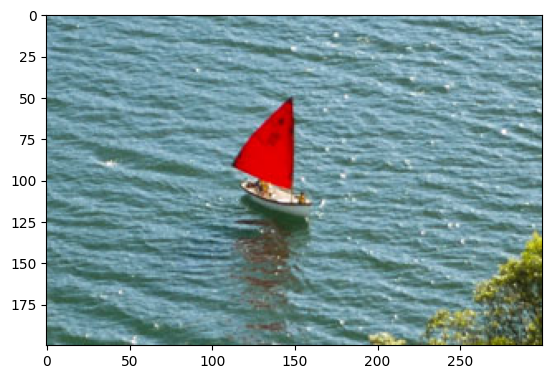

In [6]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image

2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">Opencv Documentation</font>

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Documentation link</a>

### <font color="green"> Method 1: Specifying Scaling Factor using fx and fy


Here is the full syntax for the resize() method in OpenCV:

cv2.resize(src, dsize, fx, fy, interpolation)

The parameters are as follows:

src -	The file path in which the input image resides.

dsize -	The size of the output image, which adheres to the syntax (width, height).

fx - The scale factor for the X axis.

fy -	The scale factor for the Y axis.

interpolation -	The technique for adding or removing pixels during the resizing process. The default is cv2.INTER_LINEAR.

origonal Image size: (200, 300, 3)
(400, 600, 3)


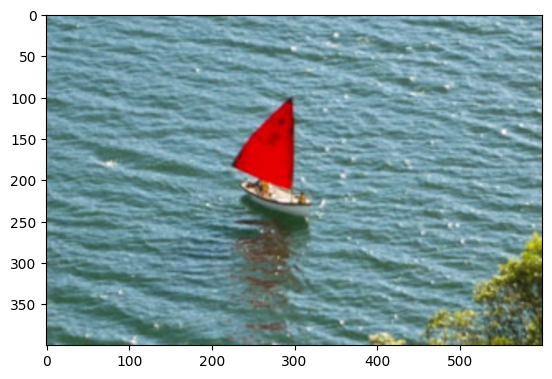

In [7]:
print("origonal Image size:",cropped_region.shape)
resized_cropped_region_2x = cv.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)
print(resized_cropped_region_2x.shape)

Resize the image of, say, a size of 800×600 pixels, to 300×400 pixels:


### <font color="green">Medthod 2: Specifying exact size of the output image</font>

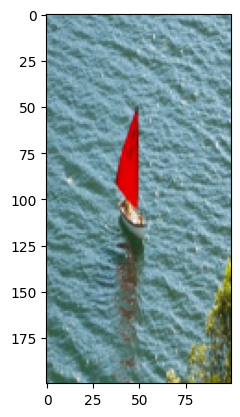

In [8]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv.resize(cropped_region, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_cropped_region)

(400, 300, 3)


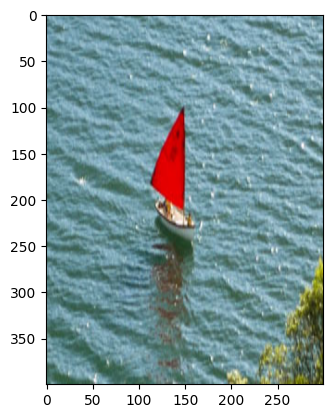

In [9]:
new_image=cv.resize(cropped_region, (300,400))  #(width is 300, height is 400).
plt.imshow(new_image)
print(new_image.shape)

### <font color="green">Resize while maintaining aspect ratio</font>

##### An aspect ratio is a proportional relationship between an image's width and height. Essentially, it describes an image's shape. Aspect ratios are written as a formula of width to height, like this: 3:2. For example, a square image has an aspect ratio of 1:1, since the height and width are the same.

Calculated desired_height  133


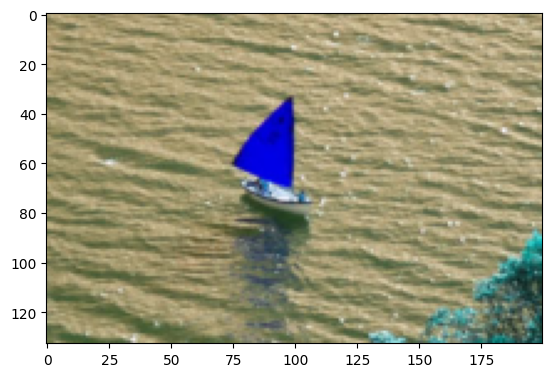

In [18]:
# Method 2: Using 'dsize'
desired_width = 200
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)
print("Calculated desired_height ",desired_height)
# Resize image
resized_cropped_region = cv.resize(cropped_region, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_cropped_region)

### <font style="color:rgb(8,133,37)">Let's actually show the (cropped) resized image.</font>

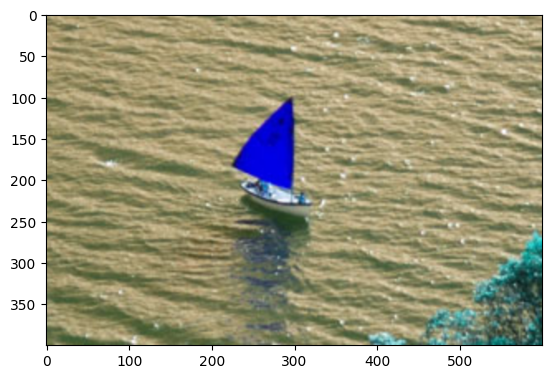

In [11]:
# Swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

# Save resized image to disk
cv.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
plt.imshow(resized_cropped_region_2x)

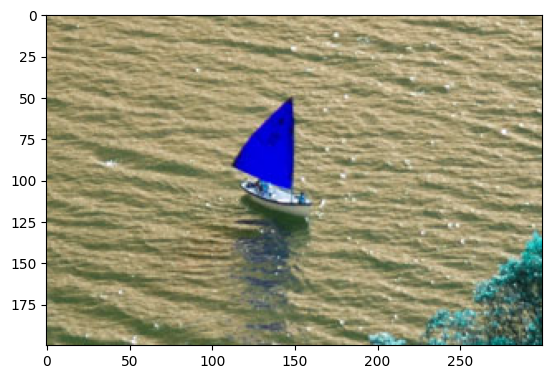

In [12]:
# Swap channel order
cropped_region = cropped_region[:, :, ::-1]

# Save cropped 'region'
cv.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
plt.imshow(cropped_region)

Height and width of original image: 280 430
New height and width:  340 450


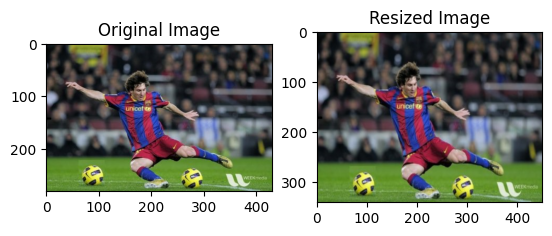

In [13]:
import cv2
import matplotlib.pyplot as plt

# read the input image
img = cv2.imread('Images/messi5.png')

h, w, c = img.shape

print("Height and width of original image:", h,w )

# resize the image
new_size = (450, 340) # new_size=(width, height)
print("New height and width: ", new_size[1], new_size[0]  )

resize_img = cv2.resize(img, new_size)

# Convert the images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(img), plt.title("Original Image")
plt.subplot(122), plt.imshow(resize_img), plt.title("Resized Image")
plt.show()

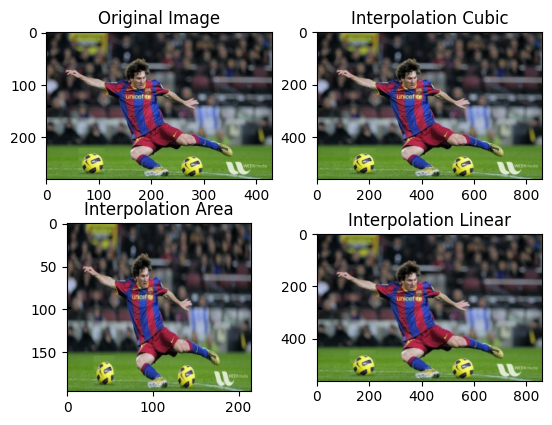

In [14]:
resize_cubic = cv2.resize(img,(0, 0),fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
resize_area = cv2.resize(img,(0, 0),fx=0.5, fy=0.7, interpolation = cv2.INTER_AREA)

resize_linear = cv2.resize(img,(0, 0),fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

# display the original and resized images
plt.subplot(221),plt.imshow(img), plt.title("Original Image")
plt.subplot(222), plt.imshow(resize_cubic), plt.title("Interpolation Cubic")
plt.subplot(223), plt.imshow(resize_area), plt.title("Interpolation Area")
plt.subplot(224), plt.imshow(resize_linear), plt.title("Interpolation Linear")
plt.show()

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font style="color:rgb(8,133,37)">Opencv Documentation</font>

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Documentation link</a>

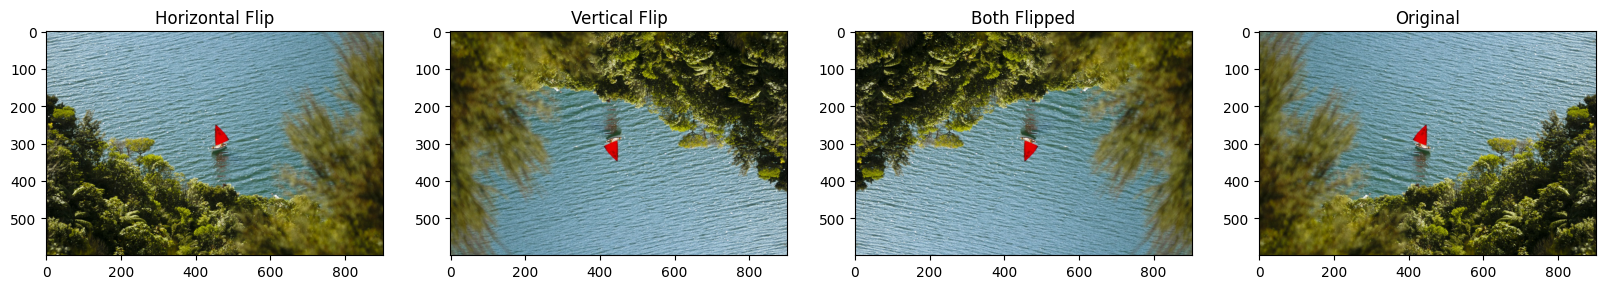

In [15]:
img_NZ_rgb_flipped_horz = cv.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");


staticmethod

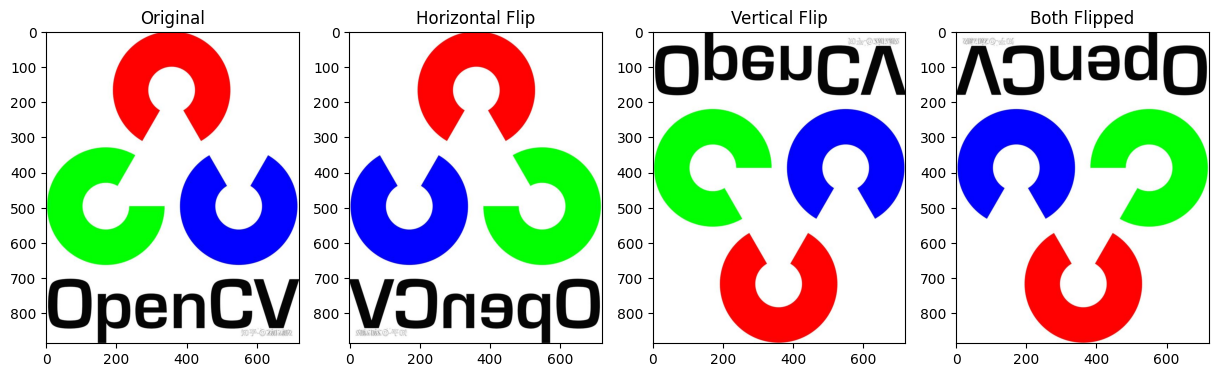

In [16]:
img=cv.imread("Images/opencv_logo1.jpg")
img_rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_rgb_flipped_horz = cv.flip(img_rgb, 1)
img_rgb_flipped_vert = cv.flip(img_rgb, 0)
img_rgb_flipped_both = cv.flip(img_rgb, -1)

# Show the images
plt.figure(figsize=(15, 5))
plt.subplot(141);plt.imshow(img_rgb);plt.title("Original");
plt.subplot(142);plt.imshow(img_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(143);plt.imshow(img_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(144);plt.imshow(img_rgb_flipped_both);plt.title("Both Flipped");
staticmethod

## Thank You!